In [1]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data = tf.keras.utils.image_dataset_from_directory("data")
# Get another batch of images and labels
batch = data_iterator.next()

Found 3292 files belonging to 2 classes.


In [8]:
batch[0].shape

(32, 256, 256, 3)

In [9]:
# class 1 = pneumonia
# class 0 = normal
batch[1] # labels

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0])

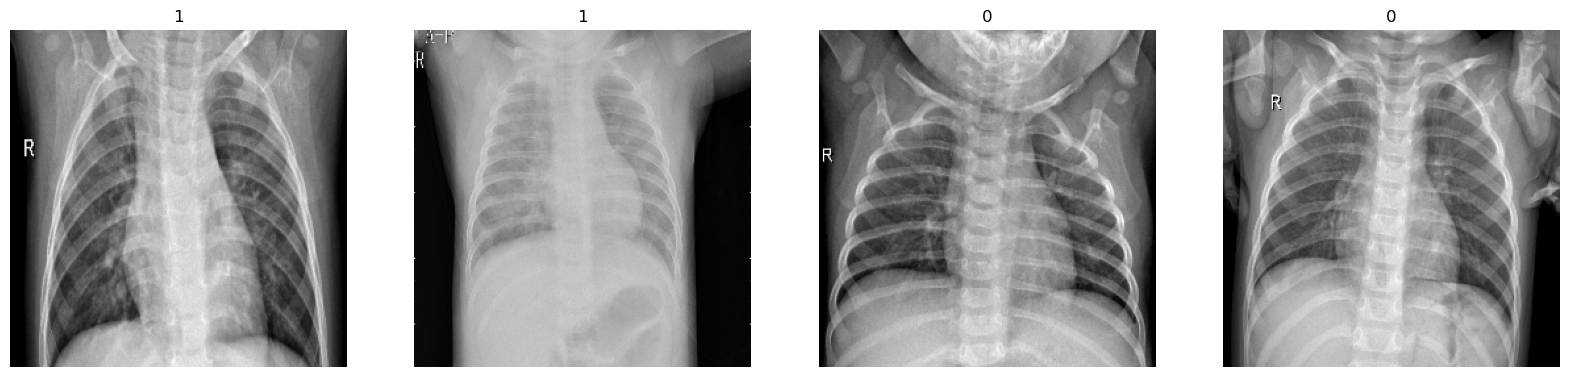

In [10]:
fix, ax = plt.subplots(ncols=4,  figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(np.uint8))
    ax[idx].set_title(batch[1][idx])
    ax[idx].axis("off")

# Preprocess data

## scale data

In [13]:
data = data.map(lambda x, y: (x / 255, y))
scaled_iterator =  data.as_numpy_iterator()
batch = scaled_iterator.next()

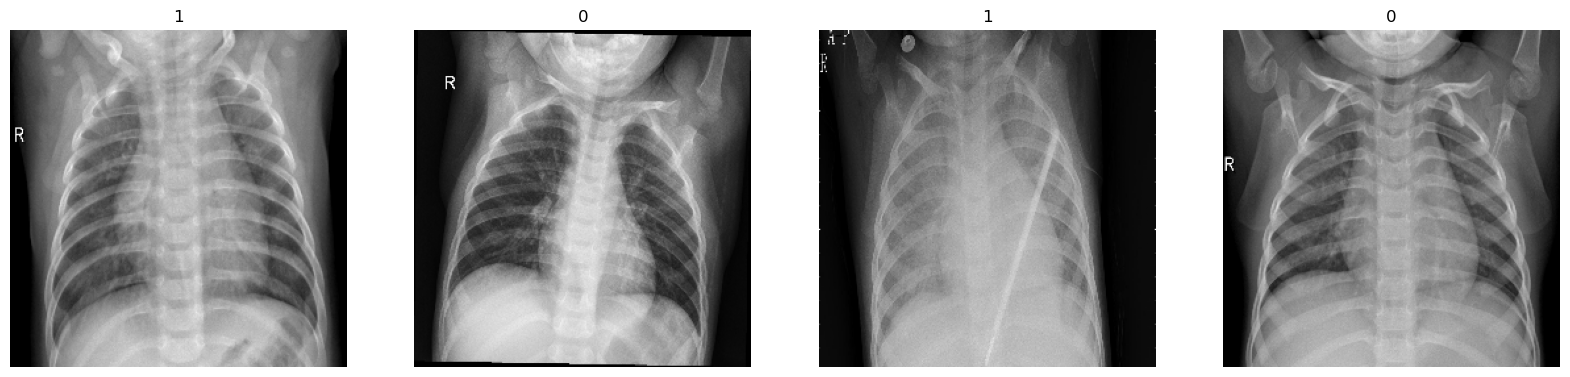

In [16]:
fix, ax = plt.subplots(ncols=4,  figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].set_title(batch[1][idx])
    ax[idx].axis("off")

## split data

In [18]:
train_size = int(len(data) * 0.70)
val_size = int(len(data) * 0.20)
test_size = int(len(data) * 0.10)
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

# Deep Learning model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [25]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

## train

In [31]:
hist = model.fit(train, validation_data=val, epochs=30)

Epoch 1/30
72/72 [==============================] - 76s 962ms/step - loss: 3.1344 - accuracy: 0.7409 - val_loss: 0.2528 - val_accuracy: 0.9109
Epoch 2/30
72/72 [==============================] - 65s 868ms/step - loss: 0.1653 - accuracy: 0.9427 - val_loss: 0.1603 - val_accuracy: 0.9422
Epoch 3/30
72/72 [==============================] - 61s 831ms/step - loss: 0.0846 - accuracy: 0.9718 - val_loss: 0.1523 - val_accuracy: 0.9453
Epoch 4/30
72/72 [==============================] - 62s 845ms/step - loss: 0.0409 - accuracy: 0.9944 - val_loss: 0.1338 - val_accuracy: 0.9531
Epoch 5/30
72/72 [==============================] - 59s 798ms/step - loss: 0.0286 - accuracy: 0.9965 - val_loss: 0.0994 - val_accuracy: 0.9625
Epoch 6/30
72/72 [==============================] - 70s 957ms/step - loss: 0.0215 - accuracy: 0.9970 - val_loss: 0.1599 - val_accuracy: 0.9500
Epoch 7/30
72/72 [==============================] - 74s 1s/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 0.9656
Ep

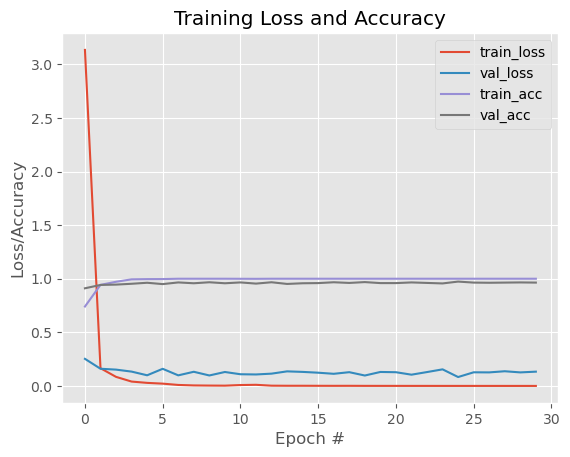

In [32]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 30), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 30), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

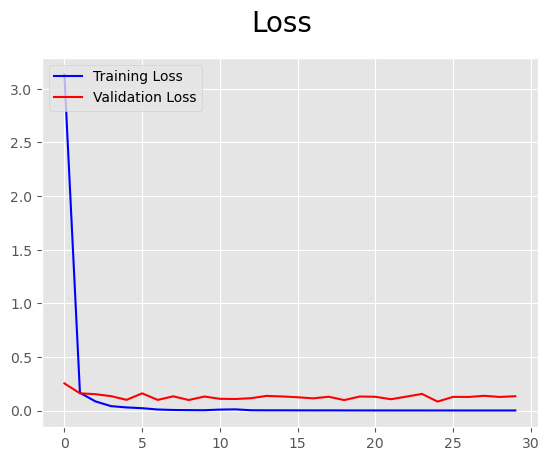

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], label='Training Loss', color='blue')
plt.plot(hist.history['val_loss'], label='Validation Loss', color='red')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()



# Evaluate performance

In [34]:
## evaluate
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator():
    x, y = batch
    y_pred = model.predict(x)
    pre.update_state(y, y_pred)
    rec.update_state(y, y_pred)
    acc.update_state(y, y_pred)

1/1 [==============================] - 0s 154ms/step


In [36]:

print("Precision: {:.3f}".format(pre.result().numpy()))
print("Recall: {:.3f}".format(rec.result().numpy()))
print("Accuracy: {:.3f}".format(acc.result().numpy()))

Precision: 0.934
Recall: 0.949
Accuracy: 0.934


## test

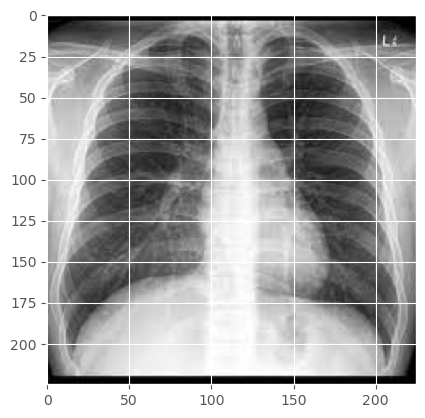

In [37]:
img = cv2.imread("normalexmp1.jpg")
plt.imshow(img)
plt.show()

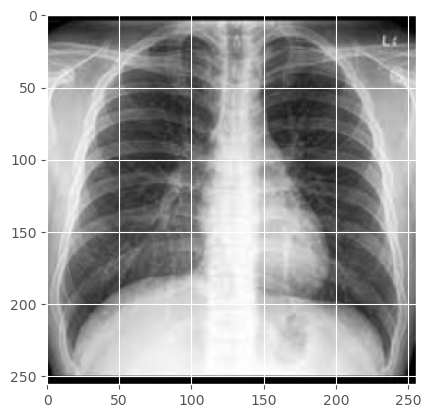

In [38]:
resize = cv2.resize(img, (256, 256))
plt.imshow(resize.astype(np.uint8))
plt.show()

In [39]:
# np.expand_dims(resize, axis=0).shape
y_pred = model.predict(np.expand_dims(resize/255, axis=0))

1/1 [==============================] - 0s 100ms/step


In [40]:
# y_pred > 0.5 # pneumonia
# y_pred < 0.5 # normal
y_pred

array([[0.00329168]], dtype=float32)

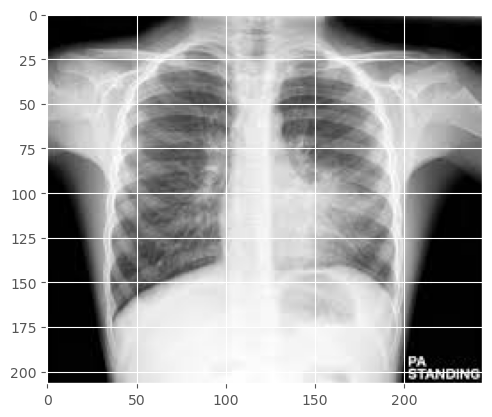

In [41]:
img = cv2.imread("hastaexmp1.jpg")
plt.imshow(img)
plt.show()

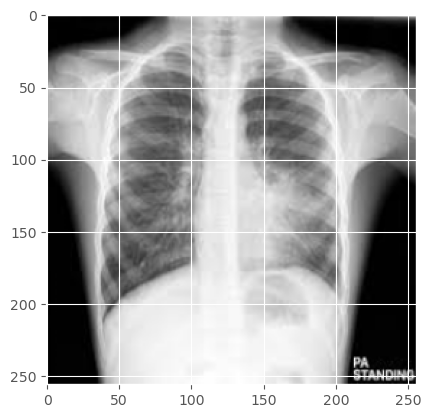

In [42]:
resize = cv2.resize(img, (256, 256))
plt.imshow(resize.astype(np.uint8))
plt.show()

In [43]:
y_pred = model.predict(np.expand_dims(resize/255, axis=0))

1/1 [==============================] - 0s 32ms/step


In [44]:
y_pred

array([[0.02360228]], dtype=float32)

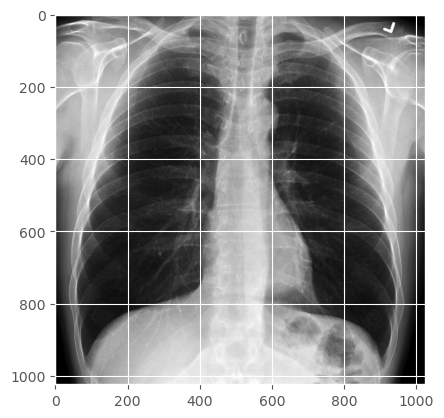

In [45]:
img = cv2.imread("normalexmp2.jpg")
plt.imshow(img)
plt.show()

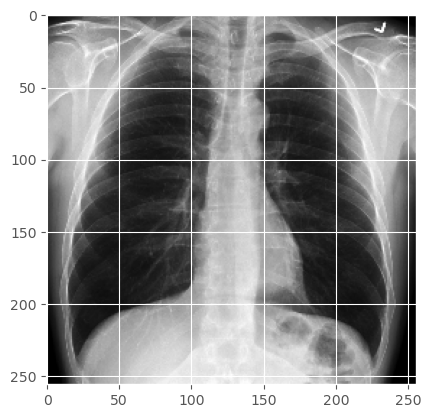

In [46]:
resize = cv2.resize(img, (256, 256))
plt.imshow(resize.astype(np.uint8))
plt.show()

In [47]:
y_pred = model.predict(np.expand_dims(resize/255, axis=0))

1/1 [==============================] - 0s 37ms/step


In [48]:
y_pred

array([[0.0025452]], dtype=float32)

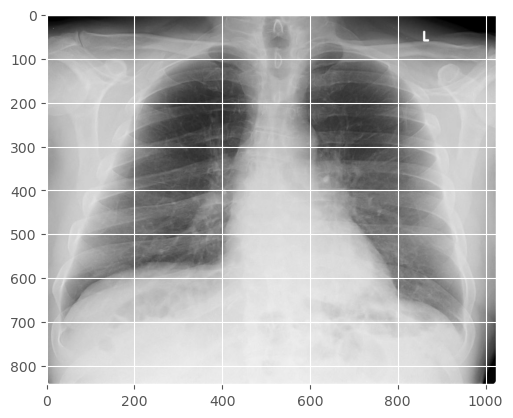

In [49]:
img = cv2.imread("hastaexmp2.jpg")
plt.imshow(img)
plt.show()

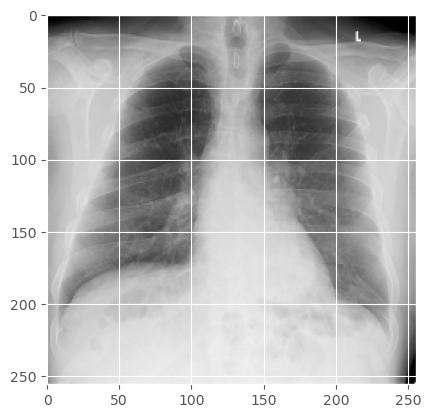

In [50]:
resize = cv2.resize(img, (256, 256))
plt.imshow(resize.astype(np.uint8))
plt.show()


In [51]:
y_pred = model.predict(np.expand_dims(resize/255, axis=0))

1/1 [==============================] - 0s 28ms/step


In [52]:
y_pred

array([[0.90236896]], dtype=float32)